In [1]:
import pandas as pd

In [21]:
train_df = pd.read_csv('drop_train.csv',nrows=5_000_000)

In [22]:
# 승객수 6명
train_df = train_df[train_df['passenger_count']<=6]

In [5]:
test = pd.read_csv('test.csv')

In [10]:
test[test['pickup_latitude']>180]
# test에서는 상식적인 위도 경도 선을 벗어나는 데이터 x --> train에서 위도 -90~90, 경도 -180~180

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [23]:
# 위도, 경도 이상치 제거
train_df = train_df.drop((train_df[train_df['pickup_latitude']<-90]).index, axis=0)
train_df = train_df.drop((train_df[train_df['pickup_latitude']>90]).index, axis=0)

In [25]:
train_df = train_df.drop((train_df[train_df['dropoff_latitude']<-90]).index, axis=0)
train_df = train_df.drop((train_df[train_df['dropoff_latitude']>90]).index, axis=0)
train_df = train_df.drop((train_df[train_df['pickup_longitude']<-180]).index, axis=0)
train_df = train_df.drop((train_df[train_df['pickup_longitude']>180]).index, axis=0)
train_df = train_df.drop((train_df[train_df['dropoff_longitude']<-180]).index, axis=0)
train_df = train_df.drop((train_df[train_df['dropoff_longitude']>180]).index, axis=0)

In [ ]:
#경도는 0 이상이면 x, 위도는 0이하이면 x
#오앗 ~ 최고 ~

In [32]:
# 위도, 경도 이상치 제거
train_df = train_df.drop((train_df[train_df['pickup_latitude']<=0]).index, axis=0)
train_df = train_df.drop((train_df[train_df['dropoff_latitude']<=0]).index, axis=0)

train_df = train_df.drop((train_df[train_df['pickup_longitude']>=0]).index, axis=0)
train_df = train_df.drop((train_df[train_df['dropoff_longitude']>=0]).index, axis=0)

In [33]:
train_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...,...
4999995,5000031,2013-03-23 12:10:56.0000001,15.0,2013-03-23 12:10:56 UTC,-74.000049,40.732998,-73.953992,40.766921,1
4999996,5000032,2013-02-10 18:26:06.0000002,7.5,2013-02-10 18:26:06 UTC,-73.966006,40.762430,-73.980664,40.764354,1
4999997,5000033,2015-05-25 22:32:49.0000004,7.5,2015-05-25 22:32:49 UTC,-74.004662,40.742188,-73.989403,40.729233,1
4999998,5000034,2010-02-16 18:37:00.00000055,10.5,2010-02-16 18:37:00 UTC,-74.003178,40.732828,-73.977775,40.749392,1


In [40]:
train_df.shape

(4897309, 9)

In [45]:
train_df2 = train_df

In [42]:
train_df2.shape

(4897309, 9)

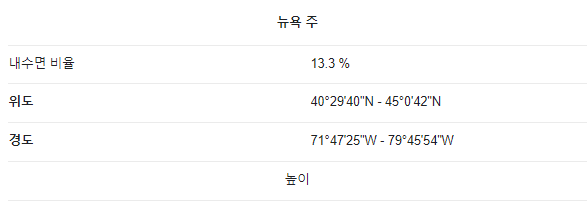

In [36]:
train_df2

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...,...
4999995,5000031,2013-03-23 12:10:56.0000001,15.0,2013-03-23 12:10:56 UTC,-74.000049,40.732998,-73.953992,40.766921,1
4999996,5000032,2013-02-10 18:26:06.0000002,7.5,2013-02-10 18:26:06 UTC,-73.966006,40.762430,-73.980664,40.764354,1
4999997,5000033,2015-05-25 22:32:49.0000004,7.5,2015-05-25 22:32:49 UTC,-74.004662,40.742188,-73.989403,40.729233,1
4999998,5000034,2010-02-16 18:37:00.00000055,10.5,2010-02-16 18:37:00 UTC,-74.003178,40.732828,-73.977775,40.749392,1


In [46]:
# 위도, 경도 이상치 제거 - 위 사진 기준
train_df2 = train_df2.drop((train_df2[train_df2['pickup_latitude']<=39]).index, axis=0)
train_df2 = train_df2.drop((train_df2[train_df2['pickup_latitude']>=46]).index, axis=0)
train_df2 = train_df2.drop((train_df2[train_df2['dropoff_latitude']<=39]).index, axis=0)
train_df2 = train_df2.drop((train_df2[train_df2['dropoff_latitude']>=46]).index, axis=0)

train_df2 = train_df2.drop((train_df2[train_df2['pickup_longitude']>=-71]).index, axis=0)
train_df2 = train_df2.drop((train_df2[train_df2['pickup_longitude']<=-80]).index, axis=0)
train_df2 = train_df2.drop((train_df2[train_df2['dropoff_longitude']>=-71]).index, axis=0)
train_df2 = train_df2.drop((train_df2[train_df2['dropoff_longitude']<=-80]).index, axis=0)

In [47]:
train_df2.shape

(4896064, 9)

In [54]:
#fare_amount가 0보다 작은 것 제외
train_df2 = train_df2.drop(train_df2[train_df2['fare_amount']<0].index, axis=0)

In [55]:
train_df2.shape

(4895877, 9)

In [64]:
train_df3 = train_df2[:1000]


In [65]:
train_df3.shape

(1000, 9)

In [89]:
#거리계산

pickup=train_df3[['pickup_longitude','pickup_latitude']]
pickup = pd.DataFrame(pickup)
pickup.head()

,pickup_longitude,pickup_latitude
0,-73.844311,40.721319
1,-74.016048,40.711303
2,-73.982738,40.761270
3,-73.987130,40.733143
4,-73.968095,40.768008


In [93]:
dropoff=train_df3[['dropoff_longitude','dropoff_latitude']]
dropoff=pd.DataFrame(dropoff)
dropoff.head()

,dropoff_longitude,dropoff_latitude
0,-73.841610,40.712278
1,-73.979268,40.782004
2,-73.991242,40.750562
3,-73.991567,40.758092
4,-73.956655,40.783762


In [91]:
distance = []

In [61]:
! pip install geopy

You should consider upgrading via the 'c:\users\jisuj\anaconda3\python.exe -m pip install --upgrade pip' command.


In [83]:
from geopy import distance

In [70]:
pickup

,pickup_longitude,pickup_latitude
0,-73.844311,40.721319
1,-74.016048,40.711303
2,-73.982738,40.761270
3,-73.987130,40.733143
4,-73.968095,40.768008
...,...,...
1020,-73.955771,40.768360
1021,-73.985617,40.763165
1022,-73.985878,40.756633
1023,-73.973026,40.786796


In [96]:
distance.distance(pickup.values[1],dropoff.values[1]).m

AttributeError: 'list' object has no attribute 'distance'

In [94]:
dist=[]

for i in range(len(dropoff.index)) : 
 result = distance.distance(pickup.values[i],dropoff.values[i]).m
 dist.append(result)
print(dist)


AttributeError: 'list' object has no attribute 'distance'

In [87]:
dist=pd.DataFrame(dist)
#4895877
dist.head()

,0
0,412.061196
1,4646.229208
2,1004.797031
3,914.153776
4,1366.163592


In [88]:
dist.shape

(1000, 1)

In [50]:
import seaborn as sns

<AxesSubplot:>

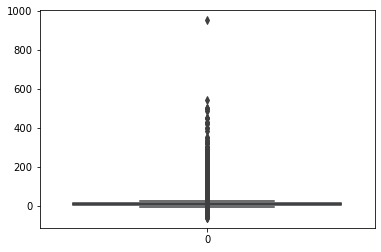

In [51]:
sns.boxplot(data=train_df2['fare_amount'])

In [52]:
train_df2[train_df2['fare_amount']>=800]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4894670,4894706,2015-02-09 15:22:07.00000013,952.0,2015-02-09 15:22:07 UTC,-73.996712,40.757793,-73.78289,40.643925,2


In [53]:
train_df2[train_df2['fare_amount']<=200]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...,...
4999995,5000031,2013-03-23 12:10:56.0000001,15.0,2013-03-23 12:10:56 UTC,-74.000049,40.732998,-73.953992,40.766921,1
4999996,5000032,2013-02-10 18:26:06.0000002,7.5,2013-02-10 18:26:06 UTC,-73.966006,40.762430,-73.980664,40.764354,1
4999997,5000033,2015-05-25 22:32:49.0000004,7.5,2015-05-25 22:32:49 UTC,-74.004662,40.742188,-73.989403,40.729233,1
4999998,5000034,2010-02-16 18:37:00.00000055,10.5,2010-02-16 18:37:00 UTC,-74.003178,40.732828,-73.977775,40.749392,1


In [97]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895877 entries, 0 to 4999999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   key                object 
 2   fare_amount        float64
 3   pickup_datetime    object 
 4   pickup_longitude   float64
 5   pickup_latitude    float64
 6   dropoff_longitude  float64
 7   dropoff_latitude   float64
 8   passenger_count    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 373.5+ MB


1. 오늘 한 내용 전체 데이터로 돌려보기 (시간 좀 걸릴거같아요)! -> shape 공유
2. 거리 계산, fare_amount와 관계
3. 전처리 -> 시간 쪼개는거(년도, 월, 일, 시간, (요일),시간(시)) , 파생변수, taxi_amount
4. boost bagging -> xgboost, randomforest, svm, gbm